# CSE 6240 - Web Search & Text Mining - Project 2

In [1]:
# __author__ = 'Bhanu Verma', 'Nilaksh Das'
# GTid = '903151012', '903129996'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.linalg import svd
import os, os.path
from PIL import Image
import random
from sklearn.linear_model import orthogonal_mp
import time
from matplotlib.pyplot import imshow
import math
%matplotlib inline

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
categoryArr = []
animalPath = 'Data/Animal'
fungusPath = 'Data/Fungus'
geoPath = 'Data/Geological Formation'
personPath = 'Data/Person'
plantPath = 'Data/Plant, flora, plant life'
sportPath = 'Data/Sport'

# animal:0, fungus:1, geo:2, person:3, plant:4, sport:5
categoryArr = [animalPath, fungusPath, geoPath, personPath, plantPath, sportPath]

In [5]:
def ksvd(Y, K, T, D=None, max_err=0, max_iter=10):
    (row_size, col_size) = Y.shape

    if D is None:
        D = np.random.rand(row_size, K)
        
    # normalize dictionary
    for i in range(K):
        D[:,i] /= norm(D[:,i])
    
    err = np.inf
    iter_val = 0
    X = np.zeros((K,row_size))
    
    while iter_val < max_iter and err > max_err:
        X = orthogonal_mp(D, Y, T, max_err)

        atoms_pos =[]
        for x in range(K):
            atoms_pos.append(x)
    
        np.random.shuffle(atoms_pos)

        redund_atoms = []

        for (i, j) in zip(atoms_pos, range(K)):
            # find non-zero values
            nonzero_x = np.nonzero(X[i,:])[0]
        
            if len(nonzero_x) == 0:
                redund_atoms.append(i)
                continue

            X[i,nonzero_x] = 0
            res_err = Y[:,nonzero_x] - np.dot(D,X[:,nonzero_x])

            # dictionary and weights are updated here
            U, s, Vt = svd(res_err)
            D[:,i] = U[:,0]
            X[i,nonzero_x] = s[0]*Vt.T[:,0]

        err_repr = Y - np.dot(D,X)
        err_repr_norm = (norm(err_repr[:,n]) for n in range(col_size))

        indices = sorted(zip(err_repr_norm, range(col_size)), reverse=True)

        for (redund_ind, tuple_err) in zip(redund_atoms, indices):
            (err, err_indices) = tuple_err

            d = Y[:,err_indices].copy()
            d -= mean(d)
            d /= norm(d)
            D[:,redund_ind] = d


        err_repr_norm = [norm(err_repr[:,n]) for n in range(col_size)]
        err = max(err_repr_norm)

        iter_val += 1
    
    return D,X

In [6]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [7]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
def calculate_KSVD_for_Image(img_arr):
    try:
        D,X = ksvd(img_arr, 100, None, D=None, max_err=0, max_iter=20)
    except:
        print("SVD error")
        D = 'Error'
        X = 'Error'

    return D,X

In [9]:
def get_image_for_index(index, mapper):
    filepath = mapper[index]
    img = Image.open(filepath)
    img_size = tuple([int(x) for x in img.size])
    img = img.resize(img_size)
    img = img.convert('L')
    img_arr = np.array(img)
    img_arr = img_arr/255.0
    
    return img_arr

In [10]:
def plot_images(before, after):
    plt.figure(i, figsize=(20, 7))

    plt.subplot(1,2,1)
    imshow(before, cmap = plt.get_cmap('gray'))

    plt.subplot(1,2,2)
    imshow(after, cmap = plt.get_cmap('gray'))

    plt.show()

    print('PSNR Value is: ', psnr(np.asarray(before),after))

In [11]:
def run_svd(index_to_name, index, total_count=8987):
    if index < 0 or index >= total_count:
        print('Error: Index out of range')
    else:
        input_img = get_image_for_index(index, index_to_name)
        D,X = calculate_KSVD_for_Image(input_img)

        if D == 'Error' or X == 'Error':
            print('Error Occurred')
        else:
            reconst_img = np.dot(D,X)
            reconst_img = reconst_img * 255.0
            input_img = input_img * 255.0
            plot_images(input_img, reconst_img)

# Few Examples

In [12]:
count = 0
name_dict = {}

for a,category in enumerate(categoryArr):
    dirList = os.listdir(category)

    for i,fname in enumerate(dirList):
        img_path = category+'/'+fname
        name_dict[count] = img_path
        count+=1

In [13]:
print(count)

8987


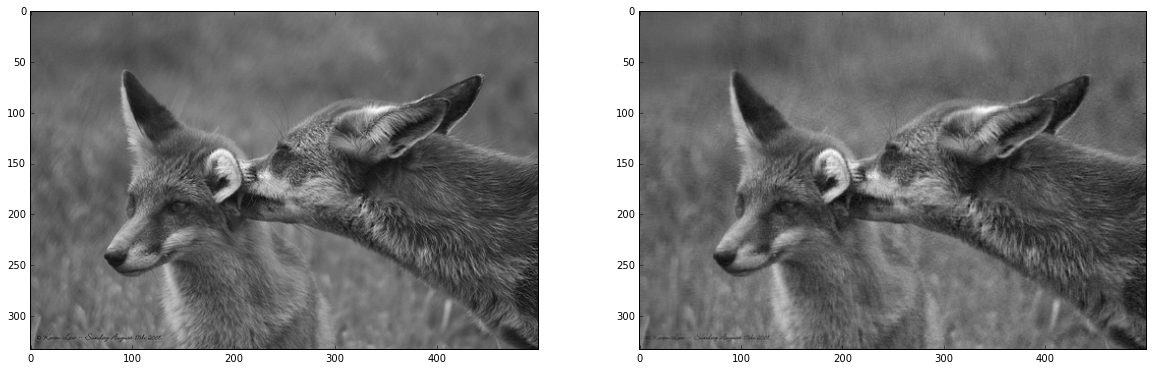

PSNR Value is:  33.85194001635363


In [14]:
run_svd(name_dict,0,count)

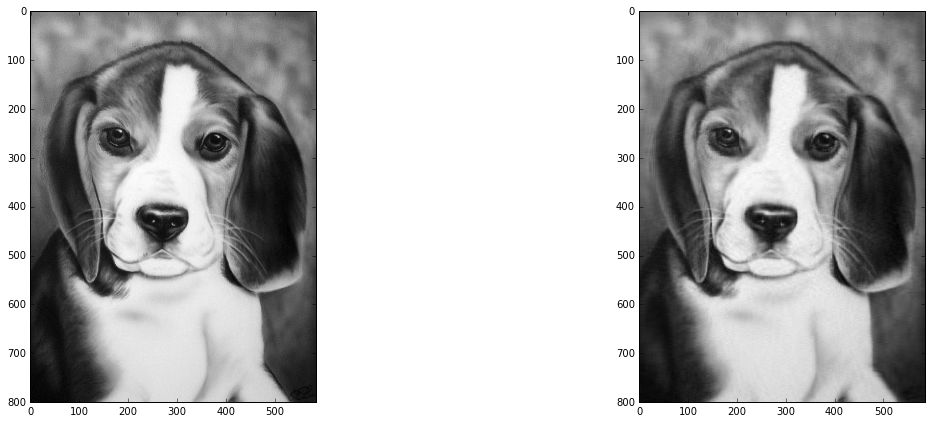

PSNR Value is:  37.36615170966639


In [15]:
run_svd(name_dict,4,count)

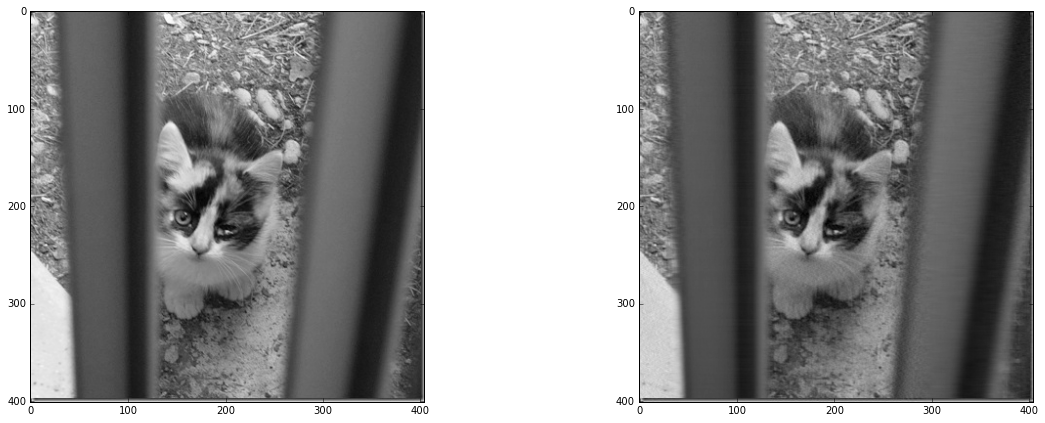

PSNR Value is:  34.38646281334725


In [16]:
run_svd(name_dict,1000,count)

In [17]:
run_svd(name_dict,2000,count)

SVD error
Error Occurred


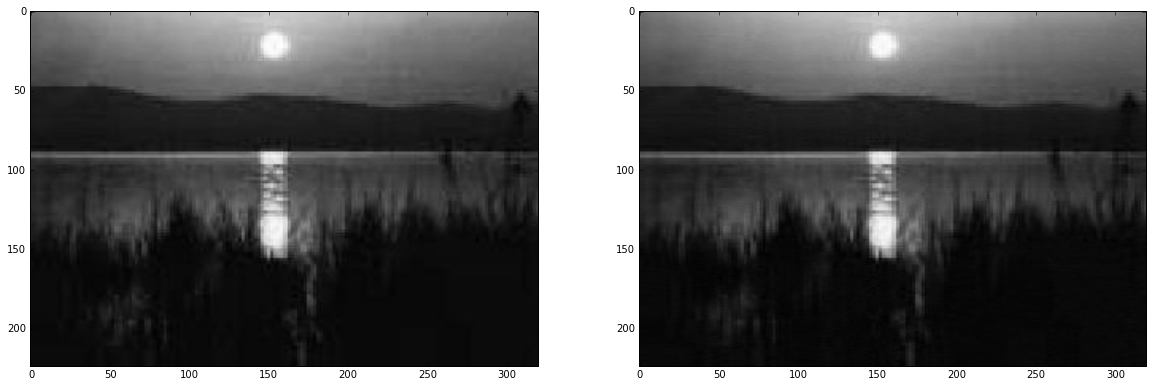

PSNR Value is:  43.94519488196008


In [18]:
run_svd(name_dict,3000)

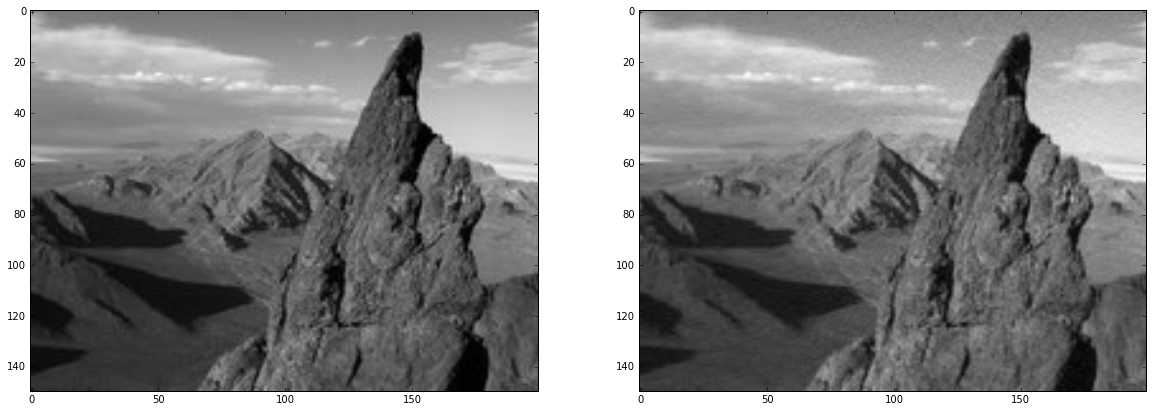

PSNR Value is:  37.63832550189239


In [19]:
run_svd(name_dict,4000,count)

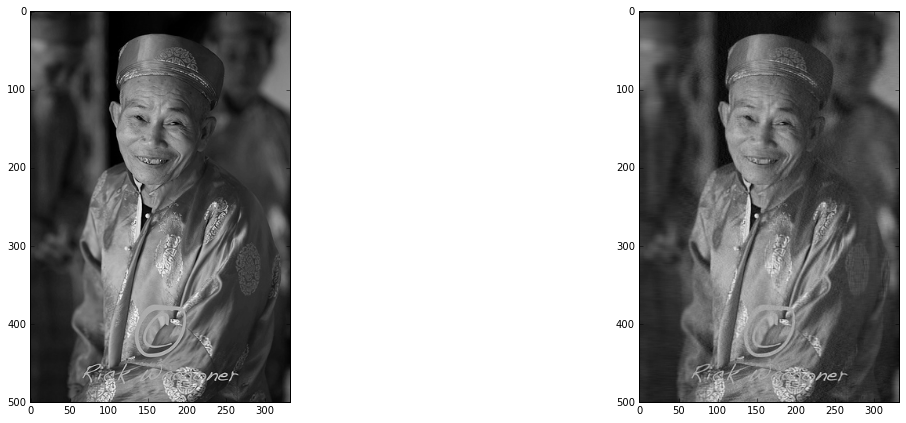

PSNR Value is:  32.94916146505759


In [20]:
run_svd(name_dict,5000,count)

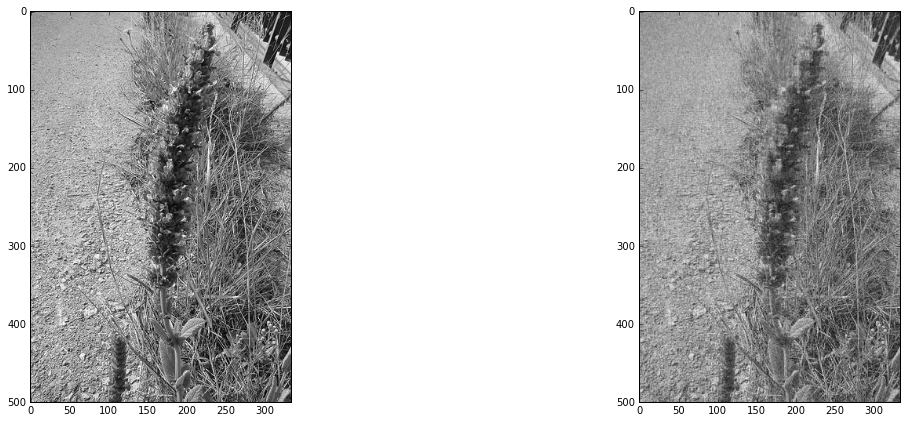

PSNR Value is:  21.34574656154812


In [21]:
run_svd(name_dict,6000,count)

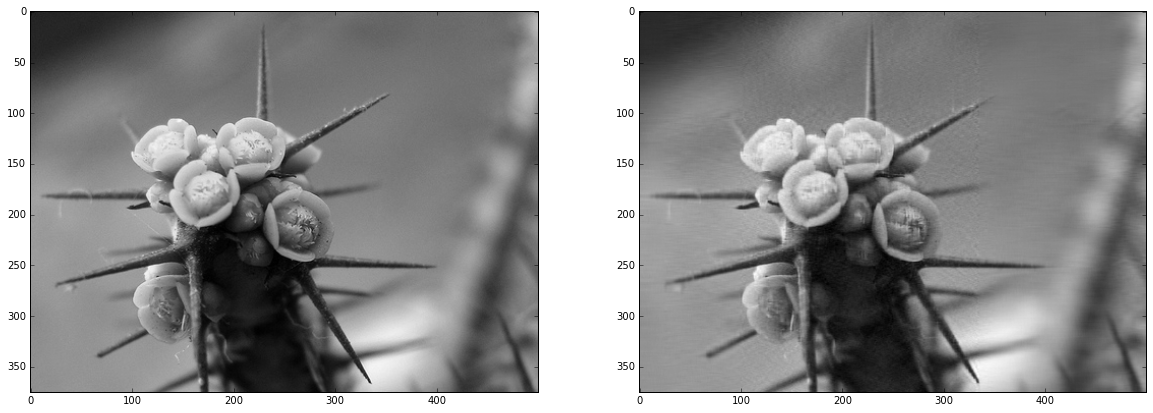

PSNR Value is:  35.16538935362937


In [22]:
run_svd(name_dict,7000,count)

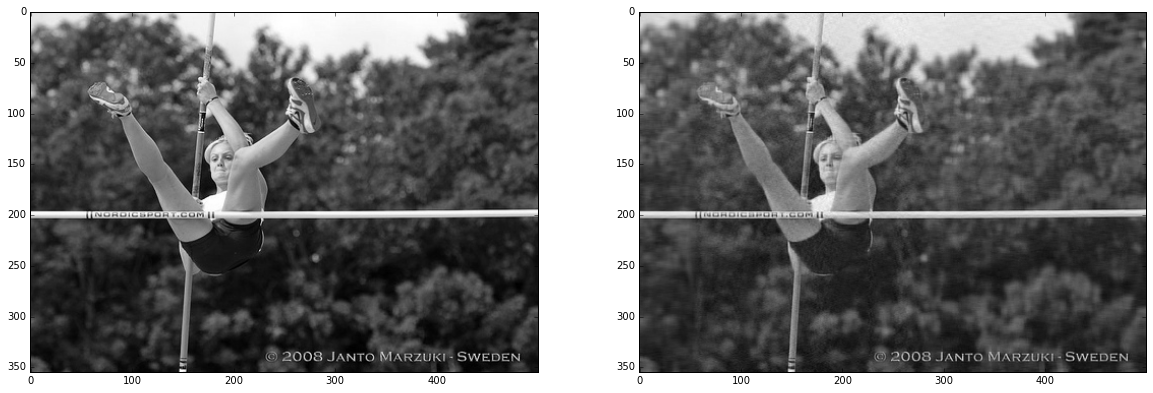

PSNR Value is:  32.26391767768781


In [23]:
run_svd(name_dict,8000,count)

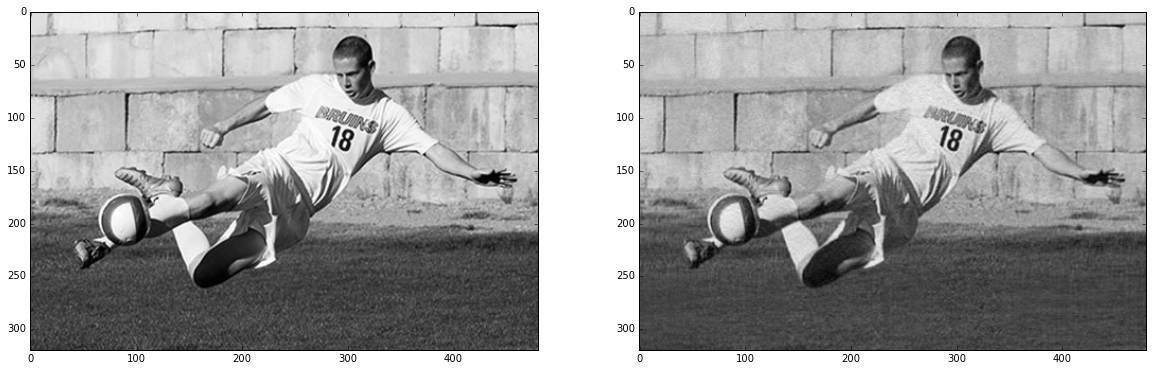

PSNR Value is:  30.013951762609086


In [24]:
run_svd(name_dict,8200,count)

In [25]:
run_svd(name_dict,9000,count)

Error: Index out of range
